<a href="https://colab.research.google.com/github/johntaraj/Katy-Or-Zooey-/blob/main/KatyPerryorZooeyDeschanel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install -U duckduckgo_search

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.7/142.7 kB 5.2 MB/s eta 0:00:00


In [ ]:
from duckduckgo_search import DDGS
from fastcore.all import *

ddgs = DDGS()

def search_images(term, max_images=200):
  print(f"Searchin for '{term}' ")
  return L(ddgs.images(term, max_results=max_images)).itemgot('image')


In [ ]:

urls = search_images('Katy Perry', max_images=1)
urls[0]


Searchin for 'Katy Perry' 


'https://celebmafia.com/wp-content/uploads/2019/03/katy-perry-2019-iheartradio-music-awards-9.jpg'

## downloading the photo that we search

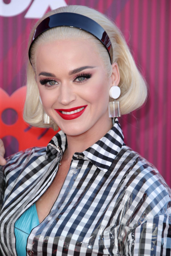

In [ ]:
from fastdownload import download_url

dest='katy.jpg'

download_url(urls[0], dest, show_progress=True)

from fastai.vision.all import* #fastai library to do photo manipulations

im= Image.open(dest)
im.to_thumb(256,256)

Searchin for 'Zooey Deschanel' 


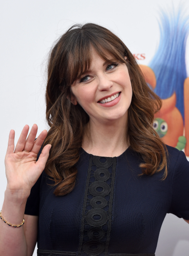

In [ ]:
#downloading now a photo of Zooey

download_url(search_images('Zooey Deschanel',max_images=1)[0], 'zooey.jpg', show_progress=True)
Image.open('zooey.jpg').to_thumb(256,256)

## Creating a dataset from DDG images

In [ ]:
searches = 'Katy Perry', 'Zooey Deschanel'
path = Path('dataSet')

from time import sleep

for o in searches:
  dest = (path/o)
  dest.mkdir(exist_ok=True, parents=True )
  download_images(dest, urls =search_images(f'{o} with glasses'))
  sleep(10)
  download_images(dest, urls =search_images(f'{o} in 2010s'))
  sleep(10)
  download_images(dest, urls =search_images(f'{o} outfits'))
  sleep(10)
  resize_images(path/o, max_size=400, dest=path/o)

Searchin for 'Katy Perry with glasses' 


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Searchin for 'Katy Perry in 2010s' 
Searchin for 'Katy Perry outfits' 
Searchin for 'Zooey Deschanel with glasses' 
Searchin for 'Zooey Deschanel in 2010s' 
Searchin for 'Zooey Deschanel outfits' 


In [ ]:
failed = verify_images(get_image_files(path)) #path here can also not be written, because the functio  get_image_files searches itself for all the images, in any subfolder of the main folder
failed.map(Path.unlink) #remove the failed photos from our repo
len(failed)

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


28

# Using the data to train and test the model

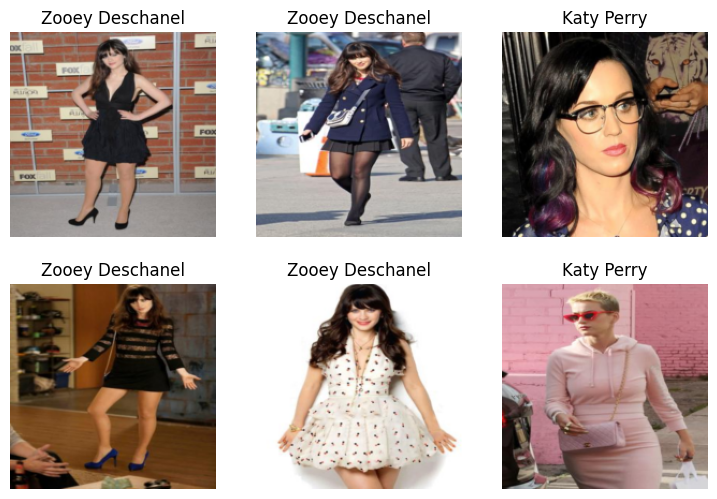

In [ ]:
dls = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct= 0.2, seed=42),
    get_y = parent_label,
    item_tfms = [Resize(192,method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [ ]:
#finetuning an already famous vision model(resnet18)

learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3) #brings an okayish error rate of 6% good enough for some random data from the internet

epoch,train_loss,valid_loss,error_rate,time
0,0.855193,0.400733,0.147208,00:05


epoch,train_loss,valid_loss,error_rate,time
0,0.353455,0.290378,0.116751,00:05
1,0.262014,0.302453,0.065990,00:04
2,0.152291,0.282070,0.060914,00:06


## MOMENT OF TRUTH!
### Lets try our model and see if it recognize Katy Perry

In [ ]:
is_katy,_, probs = learn.predict(PILImage.create('zooey.jpg'))
print(f'This is a : {is_katy}')
print(f'Probability it is Katy Perry is :{probs[0]:.4f}')

This is a : Zooey Deschanel
Probability it is Katy Perry is :0.0000


In [ ]:
learn.export('model.pkl')